In [1]:
def split1(X, y, mvalid, mtest): 
    
    # split
    X1, Xtest, y1, ytest = train_test_split(X,y, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [2]:
def split2(Xn, yn, mvalid, mtest):
    
    import random
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [3]:
def split3(Xn, yn, m, mvalid, mtest): # noise + reduced dataset
    
    import random
    
    # dataset
    n = random.sample(range(1, Xn.shape[0]), m)
    Xn = Xn[n,:] # Xn should be defined
    yn = yn[n]   # yn should be defined
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [4]:
def CNN1D(n_timesteps,n_features):
    
    model = Sequential()
    
    # Conv layers
    model.add(Conv1D(filters=16, kernel_size=3, input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    
    # Dense layer
    model.add(Dense(16, activation='relu'))
    
    # output layers
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [38]:
def train(Xtrain, ytrain, Xvalid, yvalid, model, alpha, nepoch, batchsize):
    
    # otherparameters
    m_train = Xtrain.shape[0]
    m_valid = Xvalid.shape[0]
    
    # reshape the array
    Xtrain = np.reshape(Xtrain, (m_train,n_timesteps,n_features)) # n_timesteps and n_feature = defined
    Xvalid = np.reshape(Xvalid, (m_valid,n_timesteps,n_features))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])
    
    # train the model
    
    history = model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=nepoch, batch_size = batchsize, verbose=2, shuffle = True)
    
    return [model, history];

In [6]:
def lossplot(history, lb, ub, font, ep1, ep2):
    
    # Summarize history for loss...
    plt.figure(figsize=(14,8))
    plt.plot(history.history['loss'],'-o')
    plt.plot(history.history['val_loss'],'-s')
    plt.title('Loss curve for 1D-CNN',fontsize=font+2)
    plt.ylabel('Binary cross entropy loss',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'valid'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

def accplot(history, lb, ub, font, ep1, ep2):
    
    # Summarize history for acc...
    plt.figure(figsize=(14,8))
    plt.plot(history.history['acc'],'-o')
    plt.plot(history.history['val_acc'],'-s')
    plt.title('Accuracy curve for 1D-CNN',fontsize=font+2)
    plt.ylabel('Accuracy',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'valid'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

In [7]:
from sklearn.utils.multiclass import unique_labels
import itertools
import matplotlib.pyplot as plt

fig = plt.gcf()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
      horizontalalignment = 'center',
      color = "white" if cm[i,j] > thresh else "black")

    fig.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

<Figure size 640x480 with 0 Axes>

In [8]:
def pred(model,Xtest,ytest):
    
    m_test = Xtest.shape[0]    
    Xtest = np.reshape(Xtest,(m_test,n_timesteps,n_features))
    y_predicted = model.predict_classes(Xtest, verbose = 2)
    y_actual = ytest
    
    cm = confusion_matrix(y_actual, y_predicted)
    cm_labels = ['Undamaged','Damaged']
    
    return plot_confusion_matrix(cm, classes=cm_labels, title='Confusion matrix'), print(classification_report(y_actual, y_predicted, target_names = cm_labels))

In [9]:
%matplotlib inline
import random 
import tensorflow as tf

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, MaxPooling1D, Dropout, Lambda 
from tensorflow.keras.layers import Dense, Conv1D, SimpleRNN, LSTM
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from tensorflow.keras.layers import LSTM

# Example of using LSTM
# model.add(LSTM(units=64, recurrent_activation='sigmoid', return_sequences=True

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_loss')<1e-8) and (logs.get('loss')<1e-8):
      print("\nReached perfect accuracy so cancelling training!")
      self.model.stop_training = True

epoch_schedule = myCallback()

In [11]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 5))

In [12]:

df_UD_Ax = pd.read_csv(r"C:\Users\tejar\Desktop\Ax2500_UD_03Aug20.txt",header=None)
df_UD_Flex = pd.read_csv(r"C:\Users\tejar\Desktop\Flex2500_UD_03Aug20.txt",header=None)
df_D_Ax = pd.read_csv(r'C:\Users\tejar\Desktop\Ax2500_D_03Aug20.txt', header=None)
df_D_Flex = pd.read_csv(r'C:\Users\tejar\Desktop\Flex2500_D_03Aug20.txt',header=None)

In [13]:
print("shape of D_Ax dataset=",df_D_Ax.shape)
print("shape of D_Flex dataset=",df_D_Flex.shape)
print("shape of UD_Ax dataset=",df_UD_Ax.shape)
print("shape of UD_Flex dataset=",df_UD_Flex.shape)

shape of D_Ax dataset= (2500, 8192)
shape of D_Flex dataset= (2500, 8192)
shape of UD_Ax dataset= (2500, 8192)
shape of UD_Flex dataset= (2500, 8192)


In [14]:

Datasetwithnoise= pd.read_csv(r"C:\Users\tejar\Desktop\DataSetNoiseTimeDataset4CWT.txt",header=None)

In [15]:
cleanDataset=pd.read_csv(r"C:\Users\tejar\Desktop\DataSetFeatureEngg.txt",header=None)


In [16]:
print("shape of dataset with noise =",Datasetwithnoise.shape)
print("shape of dataset clean dataset after performing feature engineering =",cleanDataset.shape)

shape of dataset with noise = (10000, 2000)
shape of dataset clean dataset after performing feature engineering = (2500, 4)


In [17]:
nfft = 1024*8
T = 0.5e-6*nfft
q = 100e3
deltaT = T/nfft
t = np.arange(0,(nfft-1)/nfft,1/nfft)
time = t*T
print(time)

[0.0000e+00 5.0000e-07 1.0000e-06 ... 4.0940e-03 4.0945e-03 4.0950e-03]


In [18]:
time.shape

(8191,)

1031


Text(0, 0.5, 'Amplitude')

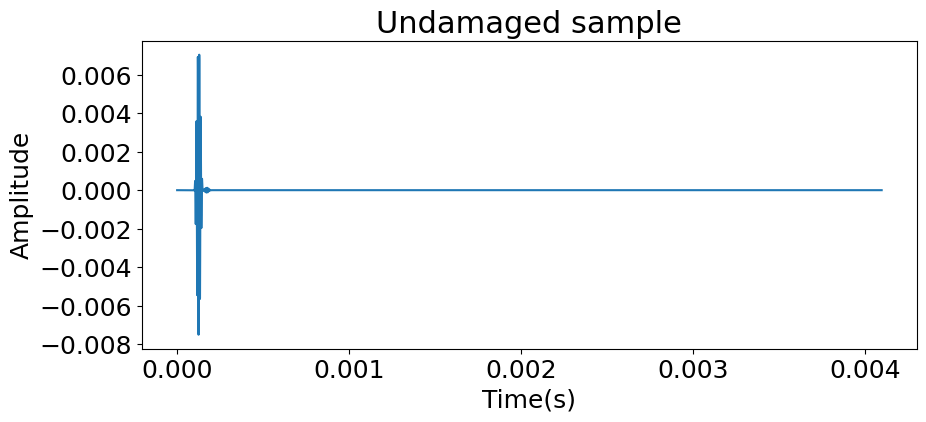

In [44]:
plt.figure(figsize=(10,4))
N = random.randint(1, 2500)
plt.plot(time, df_UD_Ax.iloc[N, 0 : df_UD_Ax.shape[1]-1])
plt.title('Undamaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time(s)',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

1990


Text(0, 0.5, 'Amplitude')

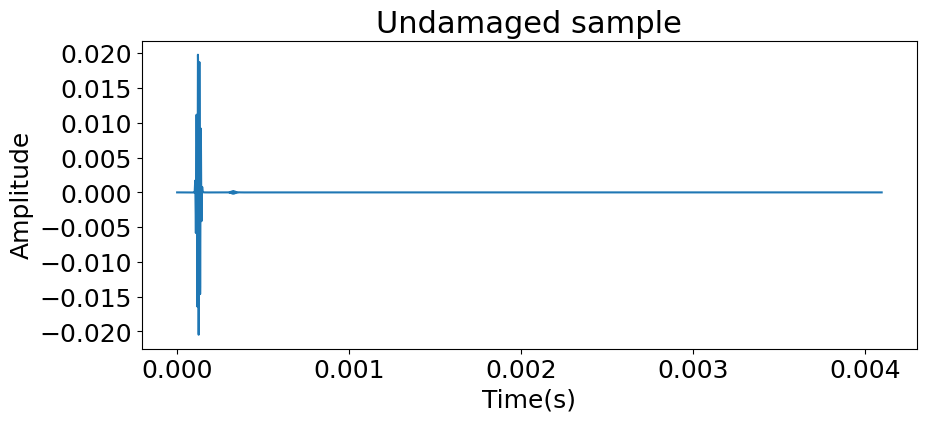

In [43]:
plt.figure(figsize=(10,4))
plt.plot(time, df_UD_Flex.iloc[N, 0 : df_UD_Flex.shape[1]-1])
plt.title('Undamaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time(s)',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

1990


Text(0, 0.5, 'Amplitude')

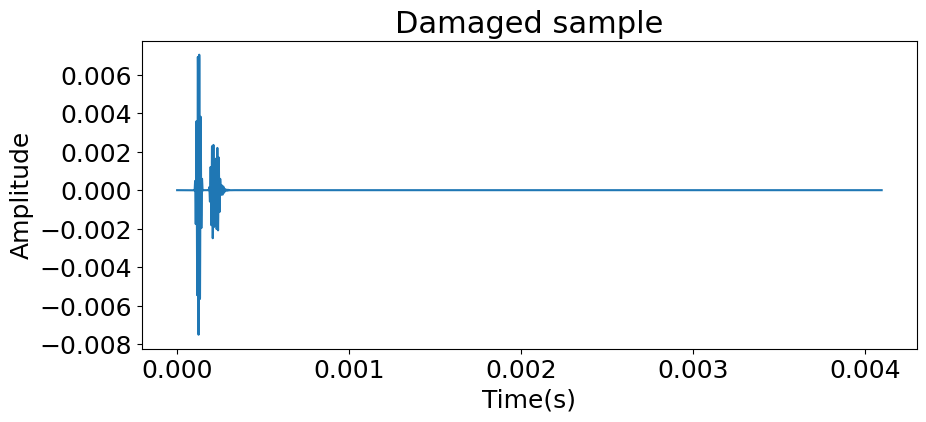

In [42]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Ax.iloc[N, 0 : df_D_Ax.shape[1]-1])
plt.title('Damaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time(s)',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

2158


Text(0, 0.5, 'Amplitude')

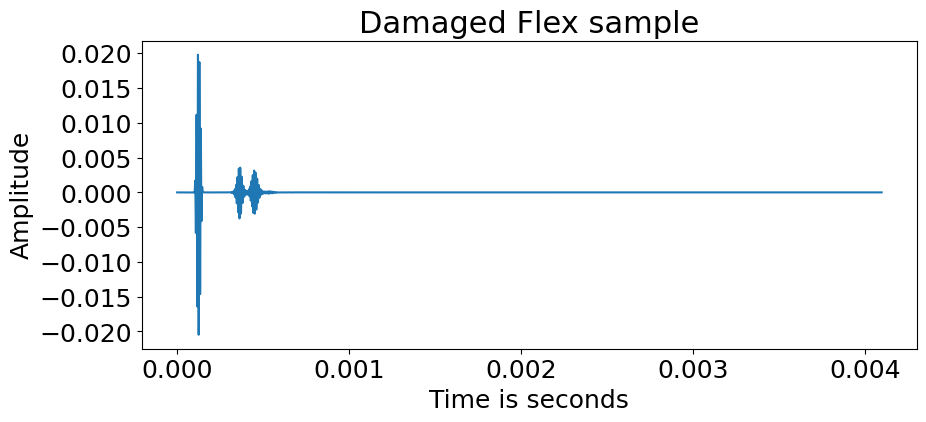

In [22]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Flex.iloc[N, 0 : df_D_Flex.shape[1]-1])
plt.title('Damaged Flex sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

In [23]:
df_D = df_D_Ax + df_D_Flex
df_UD = df_UD_Ax + df_UD_Flex

2158


Text(0, 0.5, 'Amplitude')

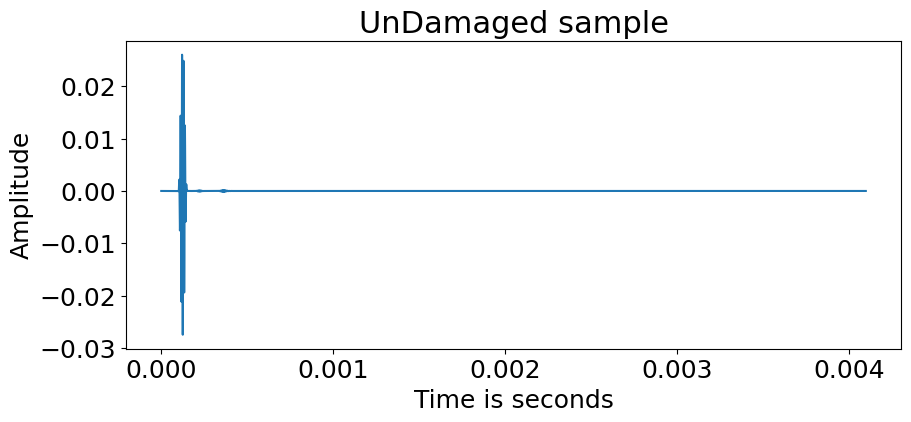

In [24]:
plt.figure(figsize=(10,4))
plt.plot(time, df_UD.iloc[N, 0 : df_UD.shape[1]-1])
plt.title('UnDamaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

2158


Text(0, 0.5, 'Amplitude')

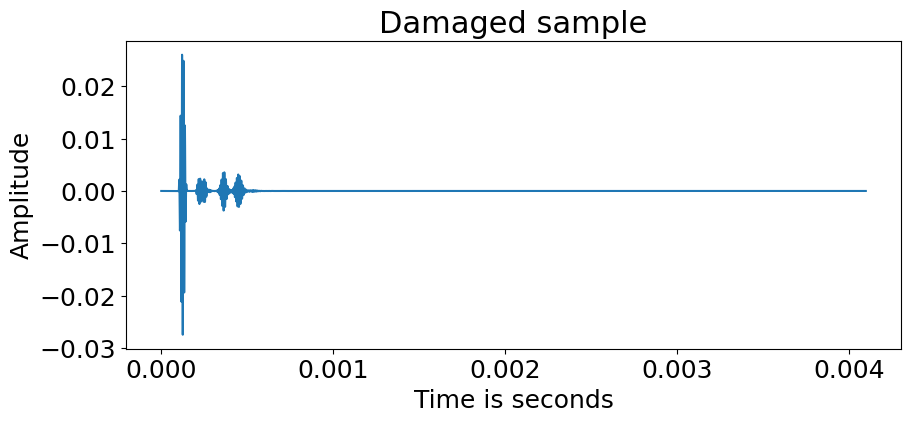

In [25]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D.iloc[N, 0 : df_D.shape[1]-1])
plt.title('Damaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

full data without noise rows=5000


In [26]:
index = np.where(time == 1e-03)
# index=
index = int(index[0])
print(index)

2000


C:\Users\tejar\AppData\Local\Temp\ipykernel_21256\1705362421.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(index[0])


From above we can see that for time 0.001sec we are getting 2000 column so will take column till 2000 becuse after that properties are constant

For Dmage Dataset

In [27]:
DAx = df_D_Ax.iloc[:, 0 : index]
DFlex = df_D_Flex.iloc[:, 0 : index]
print(DAx.shape)
print(DFlex.shape)
Dam = DAx + DFlex
# Dam = np.concatenate([DAx,DFlex], axis=1)
Dam = np.array(Dam)
Dam.shape

(2500, 2000)
(2500, 2000)


(2500, 2000)

Merging all undamged dataset

In [28]:
UDAx = df_UD_Ax.iloc[:, 0 : index]
UDFlex = df_UD_Flex.iloc[:, 0 : index]
UDam = UDAx + UDFlex
#UDam = np.concatenate([UDAx,UDFlex], axis=1)
UDam = np.array(UDam)
UDam.shape

(2500, 2000)

concatenating both damage and undamaged data means all the data

In [29]:
# Input/Features and labels extraction
X = np.concatenate([UDam,Dam], axis=0)
print(X.shape)

(5000, 2000)


In [30]:
# creating all zeros and ones for damaged and undamaged data

y_UD = np.zeros((len(UDam),1), dtype=int)
y_D = np.ones((len(Dam),1), dtype=int)
print(y_UD.shape)
print(y_D.shape)

(2500, 1)
(2500, 1)


In [31]:
y = np.concatenate([y_UD,y_D], axis=0)
y = np.array(y)
print(y.shape)

(5000, 1)


In [32]:
n_timesteps = index
n_features = 1

In [33]:
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split1(X, y, .2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)
# 20% data for validation and 5% testing data rest of 75% is training

(3800, 2000)
(250, 2000)


In [34]:
X.shape

(5000, 2000)

In [35]:
y.shape

(5000, 1)

In [36]:
model = CNN1D(n_timesteps,n_features)
model.summary()

C:\Users\tejar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1998, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 999, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 997, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 498, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 496, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 248, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       253,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,825 (1022.75 KB)

 Trainable params: 261,825 (1022.75 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 64)

Epoch 1/250
60/60 - 4s - 59ms/step - acc: 0.5016 - loss: 0.6928 - val_acc: 0.4947 - val_loss: 0.6923
Epoch 2/250
60/60 - 1s - 20ms/step - acc: 0.5250 - loss: 0.6915 - val_acc: 0.4947 - val_loss: 0.6903
Epoch 3/250
60/60 - 1s - 21ms/step - acc: 0.6034 - loss: 0.6879 - val_acc: 1.0000 - val_loss: 0.6844
Epoch 4/250
60/60 - 1s - 21ms/step - acc: 0.7121 - loss: 0.6796 - val_acc: 1.0000 - val_loss: 0.6714
Epoch 5/250
60/60 - 1s - 21ms/step - acc: 0.6921 - loss: 0.6618 - val_acc: 0.4947 - val_loss: 0.6538
Epoch 6/250
60/60 - 1s - 22ms/step - acc: 0.7566 - loss: 0.6275 - val_acc: 1.0000 - val_loss: 0.6043
Epoch 7/250
60/60 - 1s - 23ms/step - acc: 0.8311 - loss: 0.5777 - val_acc: 1.0000 - val_loss: 0.5340
Epoch 8/250
60/60 - 1s - 24ms/step - acc: 1.0000 - loss: 0.4839 - val_acc: 1.0000 - val_loss: 0.4293
Epoch 9/250
60/60 - 2s - 26ms/step - acc: 1.0000 - loss: 0.3751 - val_acc: 1.0000 - val_loss: 0.3196
Epoch 10/250
60/60 - 2s - 31ms/step - acc: 0.9997 - loss: 0.2555 - val_acc: 1.0000 - val_lo

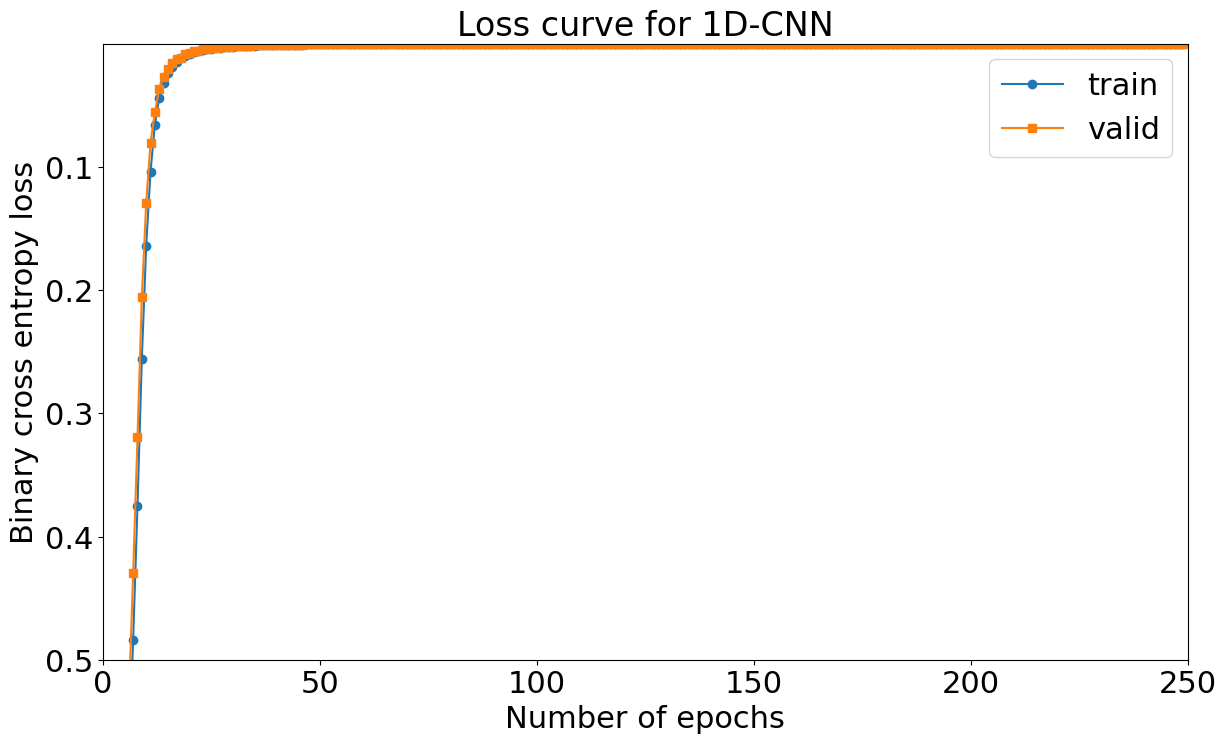

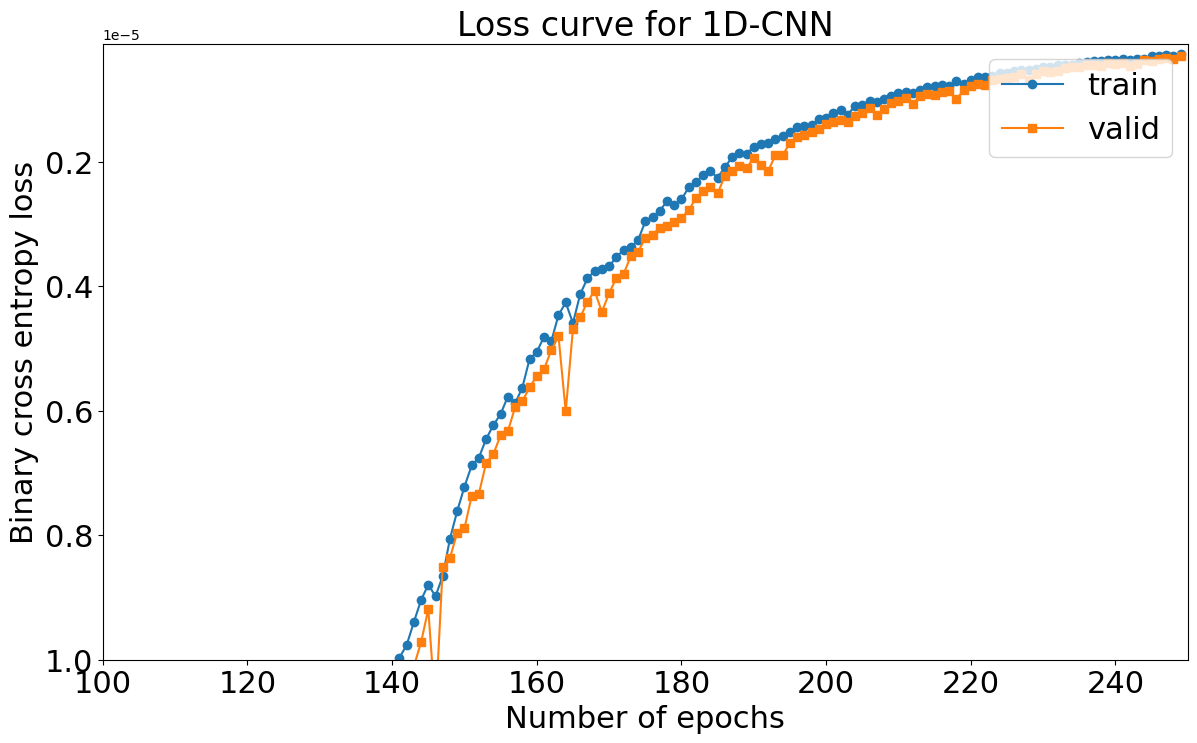

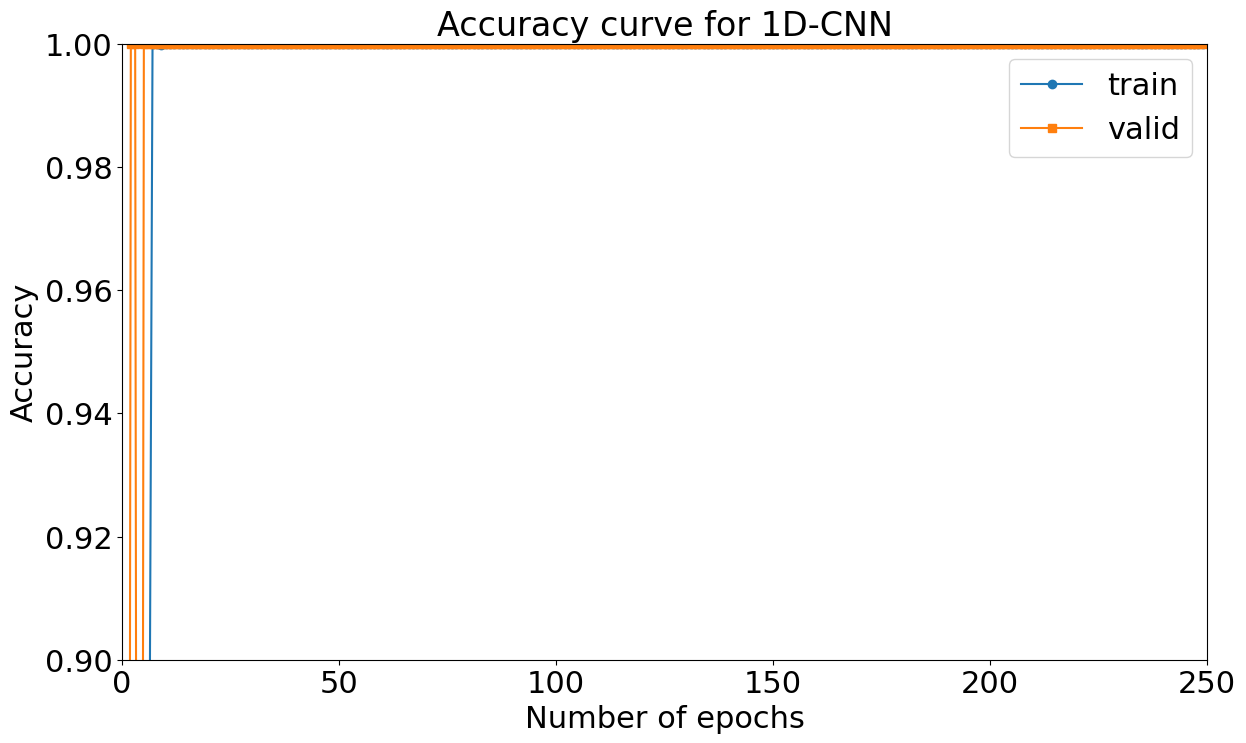

In [40]:
# call lossplot function
lossplot(history, 0.5, 1e-7, 22, 0, 250)
lossplot(history, 1e-5, 1e-7, 22, 100, 250)
# call accplot function
accplot(history, 0.9, 1.0, 22, 0, 250)